In [1]:
using Turing, Distributions
using PyPlot, PyCall

In [2]:
y = [ 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 1.0, 1.0 ];
N = length(y);
K = 3;

In [3]:
@model BayesHmm(y) = begin
    s = tzeros(Int64, N)
    m = tzeros(Dual, K)
    T = Array{Array}(K)
    for i = 1:K
        T[i] ~ Dirichlet(ones(K)/K)
        # m[i] ~ Normal(1, 0.1) # Defining m this way causes label-switching problem.
        m[i] ~ Normal(i, 0.01)
    end
    s[1] ~ Categorical(ones(Float64, K)/K)
    for i = 2:N
        s[i] ~ Categorical(vec(T[s[i-1]]))
        y[i] ~ Normal(m[s[i]], 0.01)
    end
    return(s, m)
end

[Turing]: Assume - `T` is a parameter
[Turing]: Assume - `m` is a parameter
[Turing]: Assume - `s` is a parameter
[Turing]: Observe - `y` is an observation


BayesHmm (generic function with 1 method)

In [4]:
g = Gibbs(300, HMC(1, 0.2, 5, :m, :T), PG(50, 1, :s))
s = sample(BayesHmm(y), g);

[Gibbs]: Finshed within 43.003762006759644 seconds


In [5]:
describe(s)

Iterations = 1:300
Thinning interval = 1
Chains = 1
Samples per chain = 300

Empirical Posterior Estimates:
            Mean                SD                       Naive SE              MCSE         ESS   
   s[9] 3.000000000 0.000000000000000000000000 0.0000000000000000000000000 0.0000000000 300.000000
   s[5] 1.996666667 0.057735026918962491226939 0.0033333333333333283431121 0.0033333333 300.000000
   m[1] 1.005753326 0.000000000000000667246821 0.0000000000000000385235132 0.0000000000 300.000000
   s[4] 1.006666667 0.115470053837924982453877 0.0066666666666666566862243 0.0066666667 300.000000
   s[8] 3.000000000 0.000000000000000000000000 0.0000000000000000000000000 0.0000000000 300.000000
T[2][1] 0.820502619 0.000000000000000667246821 0.0000000000000000385235132 0.0000000000 300.000000
T[2][2] 0.055821497 0.000000000000000076455365 0.0000000000000000044141526 0.0000000000 300.000000
T[2][3] 0.123675883 0.000000000000000139009754 0.0000000000000000080257319 0.0000000000 300.000000
 

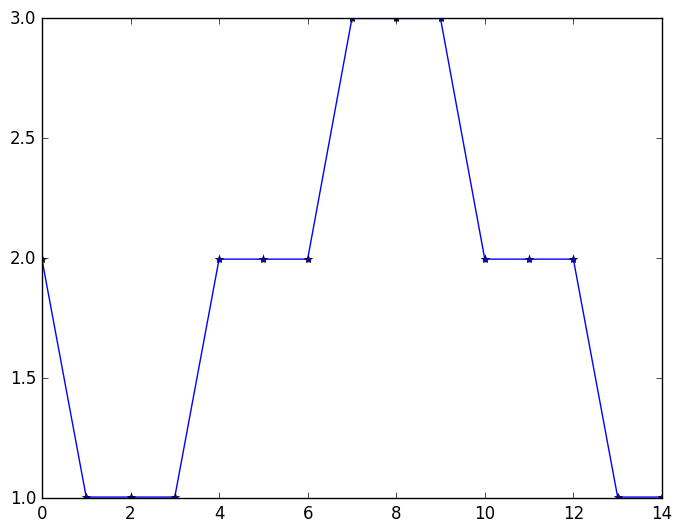

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fc86f41be90>

In [7]:
m = s[:m][111];
s = s[:s][111];
PyPlot.plot(y, linestyle="None", marker="+", color = "r")
PyPlot.plot(m[s], linestyle="-", marker="*", color = "b")